# DBTL 0.1 data analysis

This notebook analyzes OD340 and OD600 data from DBTL cycle 0.1 of flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import edd_utils as eddu

### User parameters

In [2]:
CYCLE = 0.1

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'study_slug': 'combinatorial-media-for-flaviolin-dbtl01-b40a',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
    } 

In [3]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [4]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [5]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/96 [00:00<?, ?it/s]

In [6]:
df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,147349,Combinatorial media for flaviolin DBTL0.1,147350,C0.1_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,147398,C0.1_WA1_biomek-R1,NaN,Optical Density,0,NaN,0.344,41.0
1,147349,Combinatorial media for flaviolin DBTL0.1,147351,C0.1_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,147399,C0.1_WB1_biomek-R2,NaN,Optical Density,0,NaN,0.244,41.0
2,147349,Combinatorial media for flaviolin DBTL0.1,147352,C0.1_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,147400,C0.1_WC1_biomek-R3,NaN,Optical Density,0,NaN,0.285,41.0
3,147349,Combinatorial media for flaviolin DBTL0.1,147353,C0.1_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,147401,C0.1_WD1_biomek-R4,NaN,Optical Density,0,NaN,0.000,41.0
4,147349,Combinatorial media for flaviolin DBTL0.1,147354,C0.1_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,147402,C0.1_WE1_biomek-R5,NaN,Optical Density,0,NaN,0.113,41.0


Drop unnecessary columns:

In [7]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C0.1_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.344
1,C0.1_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.244
2,C0.1_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.285
3,C0.1_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.000
4,C0.1_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.113


In [8]:
find_row = lambda x: x['Line Name'][6]
find_col = lambda x: x['Line Name'][7]
find_type = lambda x: x['Line Name'][9:15]

In [9]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)
df['Type'] =  df.apply(find_type, axis=1)

In [10]:
df.head()

,Line Name,Line Description,Protocol,Value,Row,Column,Type
0,C0.1_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.344,A,1,biomek
1,C0.1_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.244,B,1,biomek
2,C0.1_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.285,C,1,biomek
3,C0.1_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.000,D,1,biomek
4,C0.1_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD600,0.113,E,1,biomek


## Coefficient of variation

In [11]:
stats = df.groupby(['Protocol', 'Type']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df.groupby(['Protocol', 'Type']).std()
stats['CV[%]'] = 100* stats['std'] / stats['mean']
stats

mean       std       CV[%]
Protocol Type                                  
OD340    biomek  0.226042  0.275183  121.739883
         manual  0.528917  0.179019   33.846407
OD600    biomek  0.110958  0.138649  124.955550
         manual  0.257833  0.087807   34.055888

### Coefficient of variation for sucesses only

In [12]:
df_success = df[df['Value']>0]
stats_success = df_success.groupby(['Protocol', 'Type']).mean()
stats_success.rename(columns={'Value': 'mean'}, inplace=True)
stats_success['std'] = df_success.groupby(['Protocol', 'Type']).std()
stats_success['CV[%]'] = 100*stats_success['std'] / stats_success['mean']
stats_success

mean       std      CV[%]
Protocol Type                                 
OD340    biomek  0.493182  0.171013  34.675398
         manual  0.528917  0.179019  33.846407
OD600    biomek  0.242091  0.096402  39.820461
         manual  0.257833  0.087807  34.055888

## Visualization

### Biomek vs manual media

Visualize differences between the manual and biomek prepared media

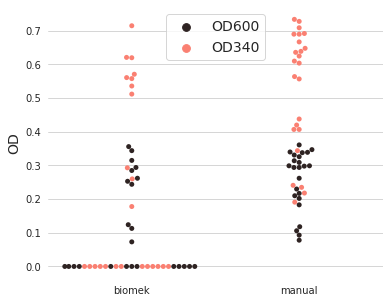

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 14
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Type',
              y='Value',
              hue='Protocol',
              palette="dark:salmon"
              )
plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
# ax.set(xlabel=None, ylabel='OD')
ax.set_ylabel("OD", fontsize=fontsize)
ax.set_xlabel(None)

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [15]:
data_od600 = df[df['Protocol']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Protocol']=='OD340'].pivot('Row', 'Column')['Value']

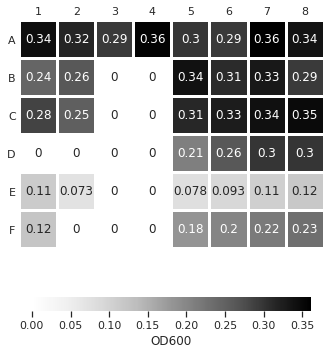

In [16]:
fig = plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
ax = sns.heatmap(data=data_od600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

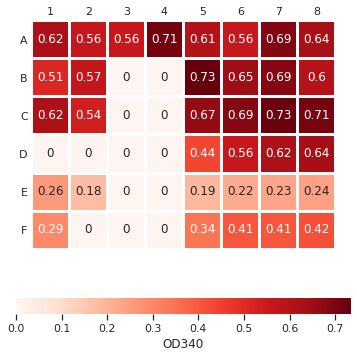

In [17]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

# Sample size calculation (clean up)

In [97]:
conf_int = 0.1*stats_ratio.loc[("OD340/OD600", "biomek"), 'mean']  # 10% around the mean value
conf_int

0.21060437341186

In [101]:
z_score = 1.645  # 90%
# z_score =  1.04  # 70%
std = stats_ratio.loc[("OD340/OD600", "biomek"), 'std']

In [102]:
sample_size = z_score**2 * std*(1 - std) / conf_int**2
sample_size

10.389128843237824

In [103]:
sample_size = 4*z_score**2 * std**2 / conf_int**2
sample_size

11.562088007165176

In [115]:
samples = df_ratio[df_ratio['Type']=='manual']['Value']
samples

Line Name
C0_WA5_manual-R1     2.046980
C0_WB5_manual-R2     2.165192
C0_WC5_manual-R3     2.124204
C0_WD5_manual-R4     2.085714
C0_WE5_manual-R5     2.448718
C0_WF5_manual-R6     1.879781
C0_WA6_manual-R7     1.894558
C0_WB6_manual-R8     2.097087
C0_WC6_manual-R9     2.116564
C0_WD6_manual-R10    2.152672
C0_WE6_manual-R11    2.344086
C0_WF6_manual-R12    2.014851
C0_WA7_manual-R13    1.916898
C0_WB7_manual-R14    2.084592
C0_WC7_manual-R15    2.141176
C0_WD7_manual-R16    2.090301
C0_WE7_manual-R17    2.216981
C0_WF7_manual-R18    1.875576
C0_WA8_manual-R19    1.881657
C0_WB8_manual-R20    2.054422
C0_WC8_manual-R21    2.043228
C0_WD8_manual-R22    2.137124
C0_WE8_manual-R23    2.042373
C0_WF8_manual-R24    1.826087
Name: Value, dtype: float64

In [18]:
from random import sample

In [19]:
cv =  lambda x: np.std(x) / np.mean(x)


In [20]:
def find_coeff_var(samples):
    samples = list(samples)
    dim = len(samples)
    n_start = 3
    n_end = dim + 1
    coeff_var_avg = np.zeros(n_end-n_start)
    coeff_var_std = np.zeros(n_end-n_start)
    n = 0
    for num_samples in (range(n_start, n_end)):
        # Repeat 100 times and average
        coeff_var = np.zeros(100)
        for i in range(100):
            # Draw num_samples from all
            current_samples = sample(samples, num_samples)
            coeff_var[i] = cv(current_samples)
        coeff_var_avg[n] = np.mean(coeff_var)
        coeff_var_std[n] = np.std(coeff_var)
        n += 1
        
    return coeff_var_avg, coeff_var_std

### Manual

In [21]:
samples = df[(df['Type']=='manual') & (df['Protocol']=='OD340')]['Value']
coeff_var_avg, coeff_var_std = find_coeff_var(samples)


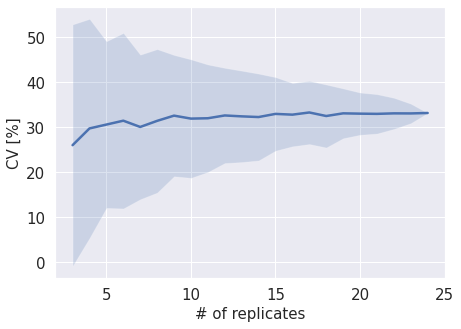

In [23]:
num_samples = range(3, len(samples)+1)
fig, ax = plt.subplots(figsize=(7, 5))
fontsize = 15
plt.plot(num_samples, 100*coeff_var_avg)
plt.fill_between(num_samples, 
                 100*coeff_var_avg-1.96*100*coeff_var_std, 
                 100*coeff_var_avg+1.96*100*coeff_var_std,
                 alpha=0.2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
ax.set_xlabel("# of replicates", fontsize=fontsize)
ax.set_ylabel("CV [%]", fontsize=fontsize)
# ax.set_ylim([0, 10])
fig.savefig(
    f"{user_params['output_file_path']}/CV_manual.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

## Biomek

In [24]:
samples = df[(df['Type']=='biomek') & (df['Protocol']=='OD340')]['Value']
coeff_var_avg, coeff_var_std = find_coeff_var(samples)


/tmp/ipykernel_73395/2608582873.py:1: RuntimeWarning: invalid value encountered in double_scalars
  cv =  lambda x: np.std(x) / np.mean(x)


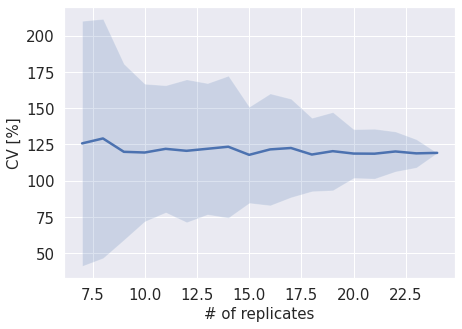

In [25]:
num_samples = range(3, len(samples)+1)

fig, ax = plt.subplots(figsize=(7, 5))
fontsize = 15
plt.plot(num_samples, 100*coeff_var_avg)
plt.fill_between(num_samples, 
                 100*coeff_var_avg-1.96*100*coeff_var_std, 
                 100*coeff_var_avg+1.96*100*coeff_var_std,
                 alpha=0.2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
ax.set_xlabel("# of replicates", fontsize=fontsize)
ax.set_ylabel("CV [%]", fontsize=fontsize)
# ax.set_ylim([0, 10])
fig.savefig(
    f"{user_params['output_file_path']}/CV_biomek.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)